In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('hotusa_cancellations.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33688 entries, 0 to 33687
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             33688 non-null  int64  
 1   HotelId                33688 non-null  int64  
 2   ReservationStatusDate  33688 non-null  object 
 3   ArrivalDate            33688 non-null  object 
 4   LeadTime               33688 non-null  int64  
 5   StaysInWeekendNights   33688 non-null  int64  
 6   StaysInWeekNights      33688 non-null  int64  
 7   Adults                 33688 non-null  int64  
 8   Children               33688 non-null  int64  
 9   CustomerType           33688 non-null  object 
 10  ADR                    33688 non-null  float64
 11  Meal                   33688 non-null  object 
 12  Country                33256 non-null  object 
 13  Company                33688 non-null  object 
 14  ReservedRoomType       33688 non-null  object 
 15  Is

# EDA

In [4]:
df.sample(10)

,Unnamed: 0,HotelId,ReservationStatusDate,ArrivalDate,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,CustomerType,ADR,Meal,Country,Company,ReservedRoomType,IsRepeatedGuest,IsCanceled
8916,14320,1,2015-12-22,2015-12-21,0,1,0,1,0,Transient,39.00,BB,NaN,NULL,A,False,False
23886,30250,1,2017-04-28,2017-04-27,0,0,1,1,0,Transient,64.60,BB,PRT,NULL,A,True,False
31254,37626,1,2017-06-24,2017-06-22,26,0,2,2,0,Transient,120.40,BB,BRA,NULL,A,False,False
13864,20197,1,2016-01-20,2016-01-11,16,3,6,2,2,Transient,85.00,BB,PRT,NULL,G,False,False
21397,27756,1,2016-09-10,2016-09-08,6,0,2,2,0,Transient,171.00,BB,PRT,NULL,A,False,False
15237,21572,1,2016-03-04,2016-03-02,5,0,2,1,0,Transient,40.00,BB,PRT,NULL,A,False,False
18546,24890,1,2017-06-14,2017-06-04,240,4,6,2,0,Transient,87.68,BB,IRL,NULL,E,True,False
5512,1189,1,2015-08-24,2015-08-17,79,2,5,2,0,Transient,133.00,HB,PRT,NULL,A,False,False
28024,34394,1,2017-03-23,2017-03-12,96,4,7,2,0,Transient-Party,74.18,HB,GBR,NULL,A,False,False
11405,17495,1,2015-10-13,2015-10-06,277,2,5,2,0,Transient-Party,68.74,HB,GBR,NULL,D,False,False


In [5]:
df.describe()

,Unnamed: 0,HotelId,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,ADR
count,33688.000000,33688.0,33688.000000,33688.000000,33688.000000,33688.000000,33688.000000,33688.000000
mean,22133.238898,1.0,85.972839,1.163649,3.074121,1.850303,0.117965,92.892934
std,11298.730622,0.0,95.587656,1.147904,2.465181,0.537657,0.421017,60.278815
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,14232.750000,1.0,7.000000,0.000000,1.000000,2.000000,0.000000,49.500000
50%,23197.500000,1.0,47.000000,1.000000,3.000000,2.000000,0.000000,74.000000
75%,31634.250000,1.0,145.000000,2.000000,5.000000,2.000000,0.000000,121.250000
max,40059.000000,1.0,737.000000,19.000000,50.000000,27.000000,3.000000,508.000000


In [6]:
df.isnull().sum()

Unnamed: 0                 0
HotelId                    0
ReservationStatusDate      0
ArrivalDate                0
LeadTime                   0
StaysInWeekendNights       0
StaysInWeekNights          0
Adults                     0
Children                   0
CustomerType               0
ADR                        0
Meal                       0
Country                  432
Company                    0
ReservedRoomType           0
IsRepeatedGuest            0
IsCanceled                 0
dtype: int64

In [7]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

In [8]:
df['IsCanceled'].replace({False: 0, True: 1},inplace = True)

C:\Users\jlmal\AppData\Local\Temp\ipykernel_20544\2268345266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IsCanceled'].replace({False: 0, True: 1},inplace = True)
C:\Users\jlmal\AppData\Local\Temp\ipykernel_20544\2268345266.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['IsCancele

In [9]:
df['IsRepeatedGuest'].replace({False: 0, True: 1},inplace = True)

C:\Users\jlmal\AppData\Local\Temp\ipykernel_20544\1482830046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IsRepeatedGuest'].replace({False: 0, True: 1},inplace = True)
C:\Users\jlmal\AppData\Local\Temp\ipykernel_20544\1482830046.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['IsRe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33688 entries, 0 to 33687
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ReservationStatusDate  33688 non-null  object 
 1   ArrivalDate            33688 non-null  object 
 2   LeadTime               33688 non-null  int64  
 3   StaysInWeekendNights   33688 non-null  int64  
 4   StaysInWeekNights      33688 non-null  int64  
 5   Adults                 33688 non-null  int64  
 6   Children               33688 non-null  int64  
 7   CustomerType           33688 non-null  object 
 8   ADR                    33688 non-null  float64
 9   Meal                   33688 non-null  object 
 10  Country                33256 non-null  object 
 11  Company                33688 non-null  object 
 12  ReservedRoomType       33688 non-null  object 
 13  IsRepeatedGuest        33688 non-null  int64  
 14  IsCanceled             33688 non-null  int64  
dtypes:

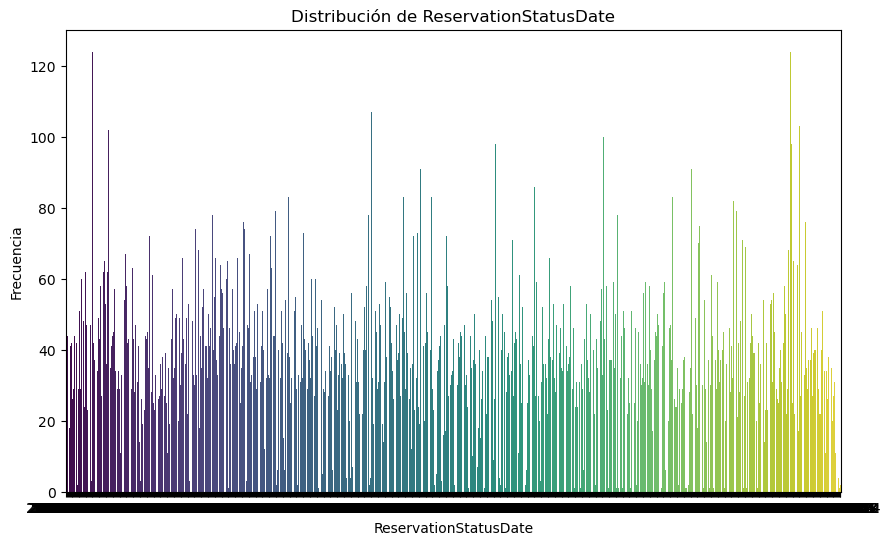

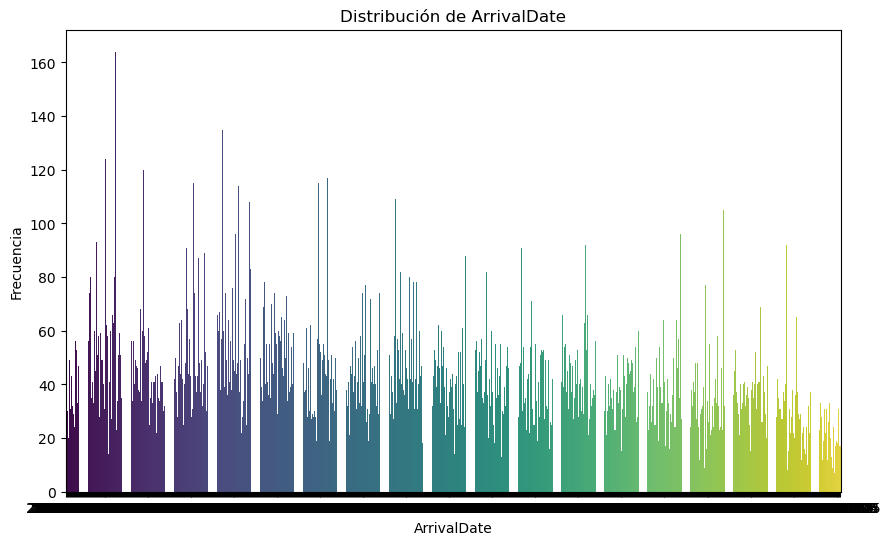

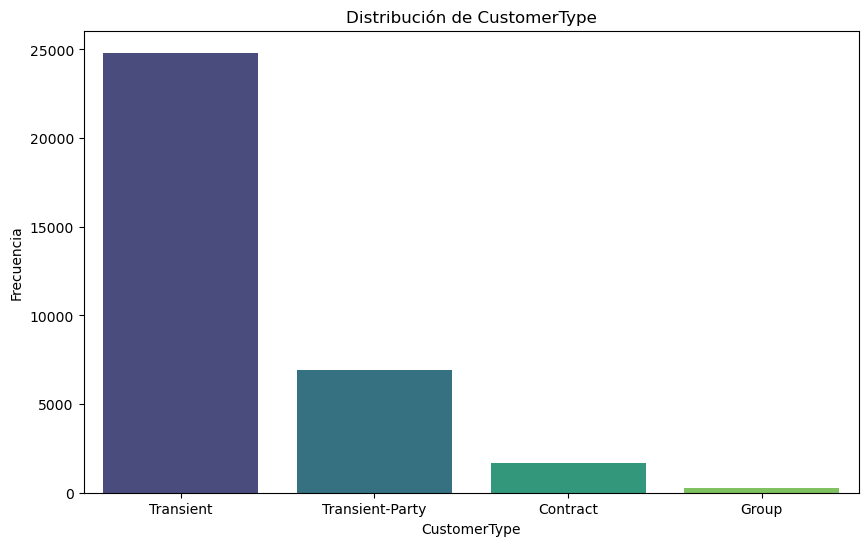

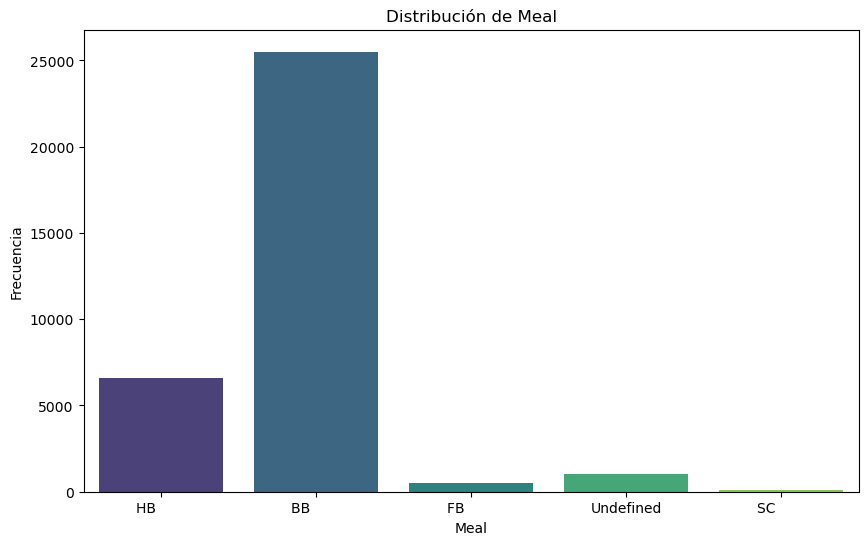

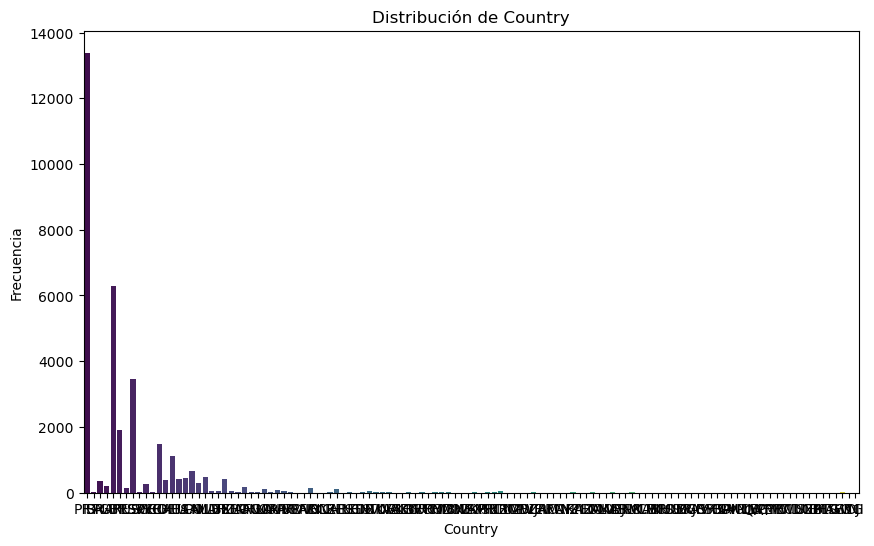

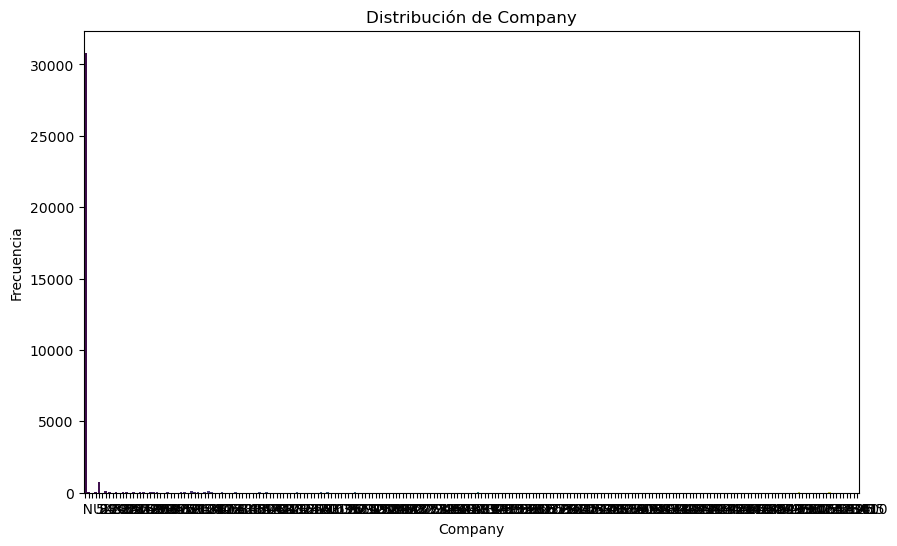

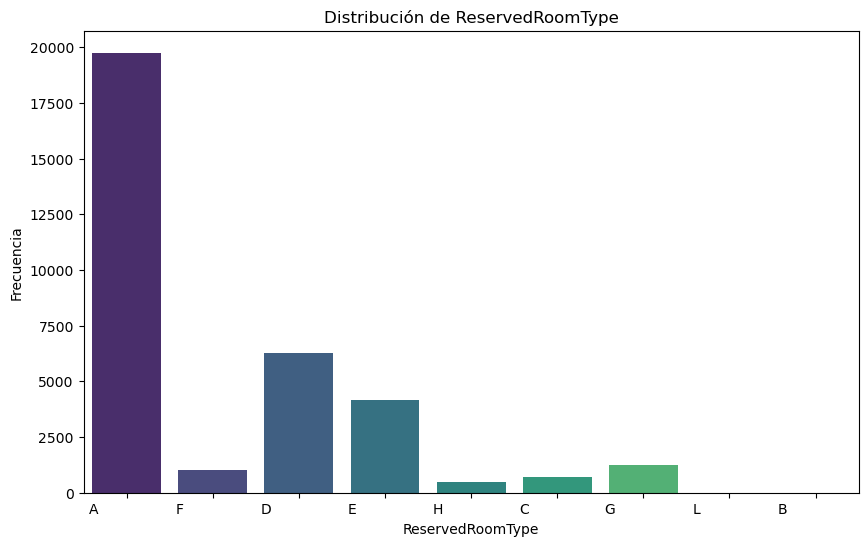

In [11]:

categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

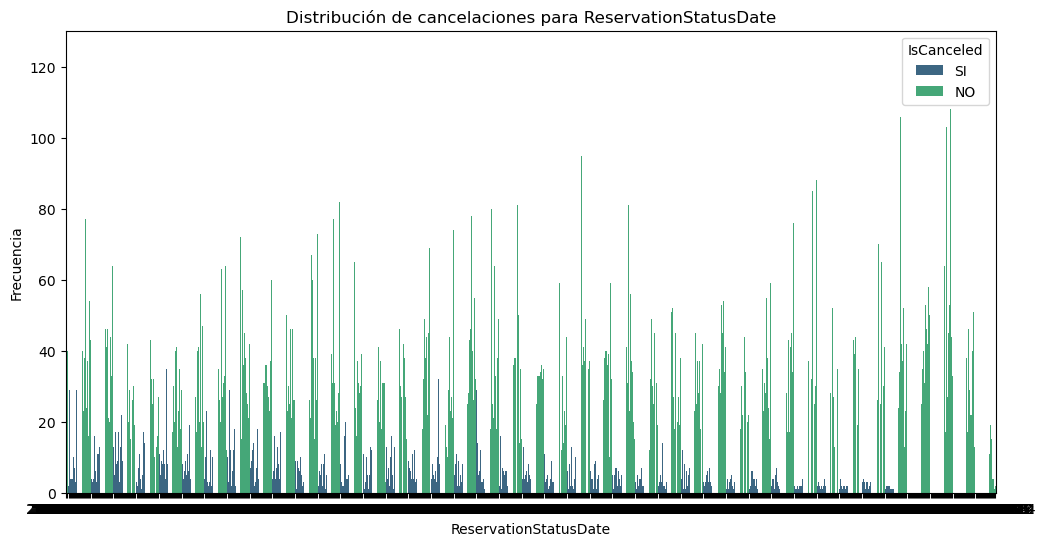

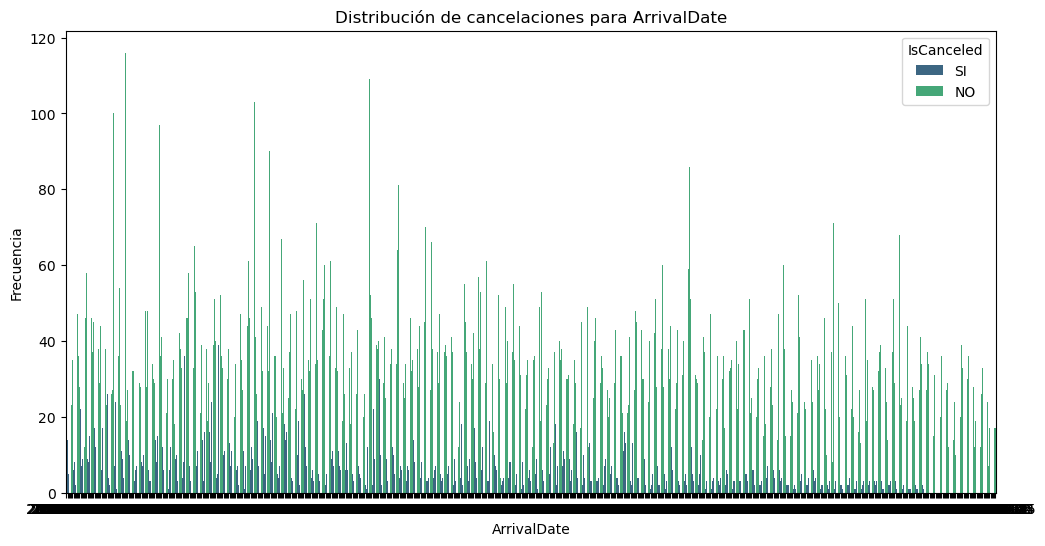

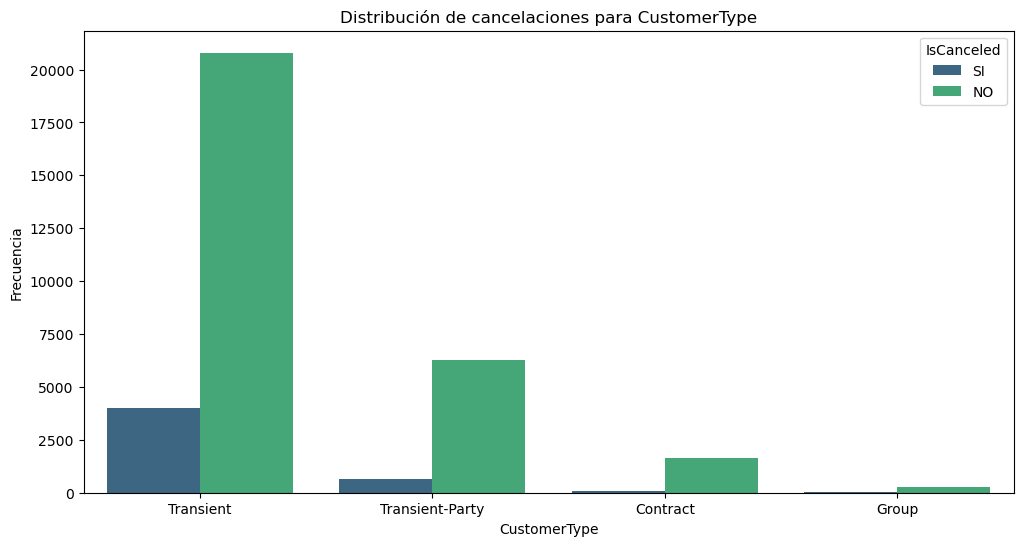

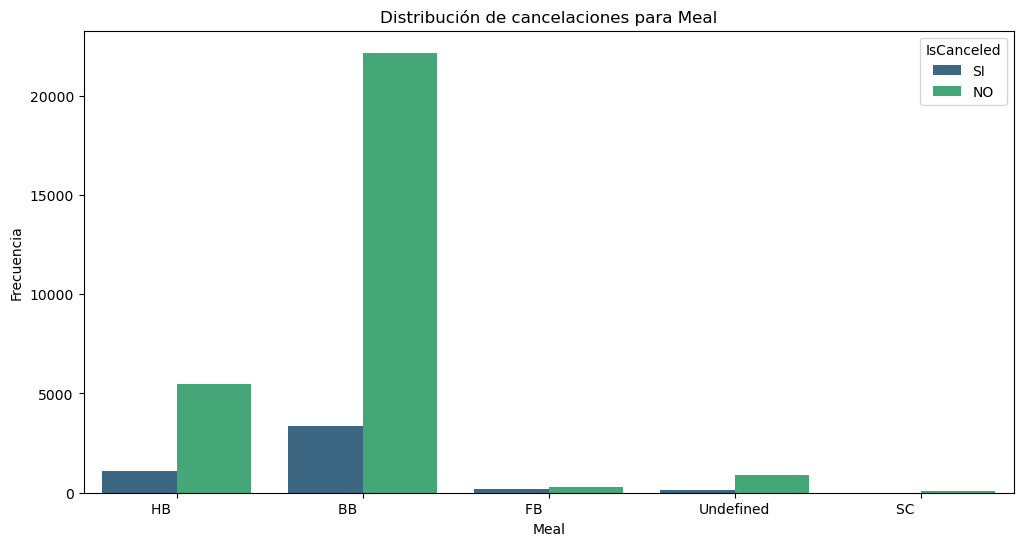

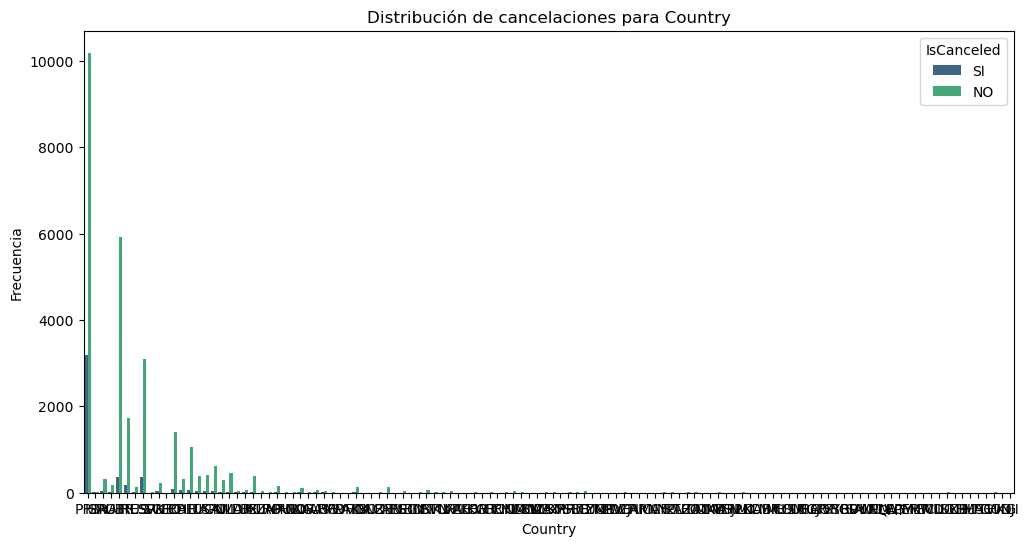

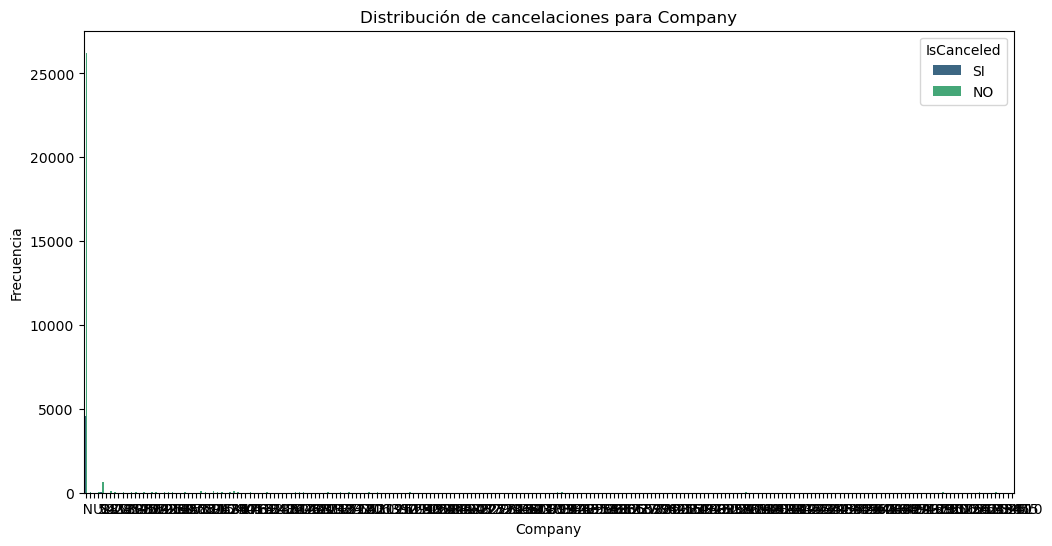

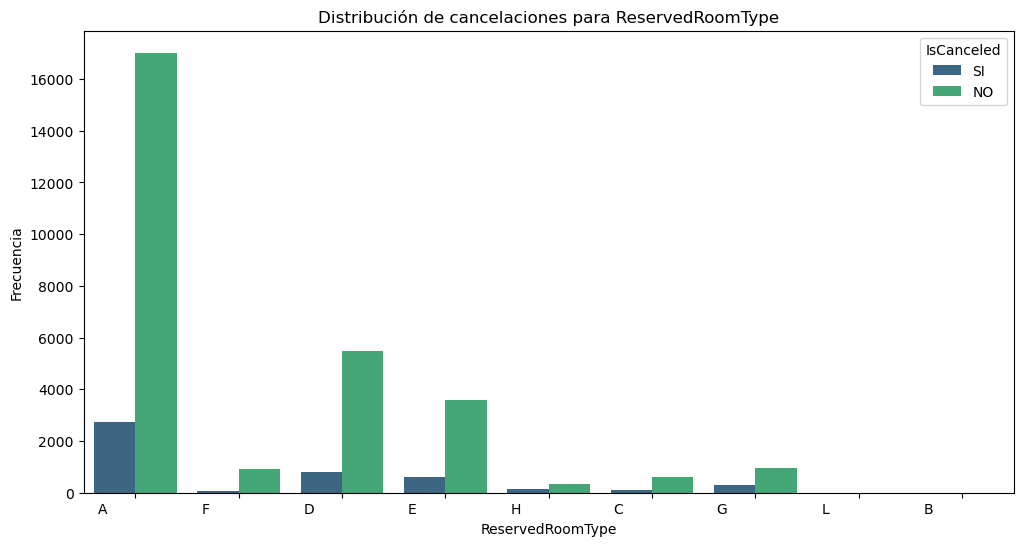

In [12]:




categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    
    # Convierte la columna 'IsCanceled' a tipo de dato string
    df['IsCanceled'] = df['IsCanceled'].astype(str)
    
    # Crea una tabla de contingencia
    contingency_table = pd.crosstab(df[column], df['IsCanceled'])
    
    # Crea un gráfico de barras apiladas
    sns.countplot(x=column, hue='IsCanceled', data=df, palette='viridis')
    
    plt.title(f'Distribución de cancelaciones para {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.legend(title='IsCanceled', loc='upper right', labels=['SI', 'NO'])
    plt.show()

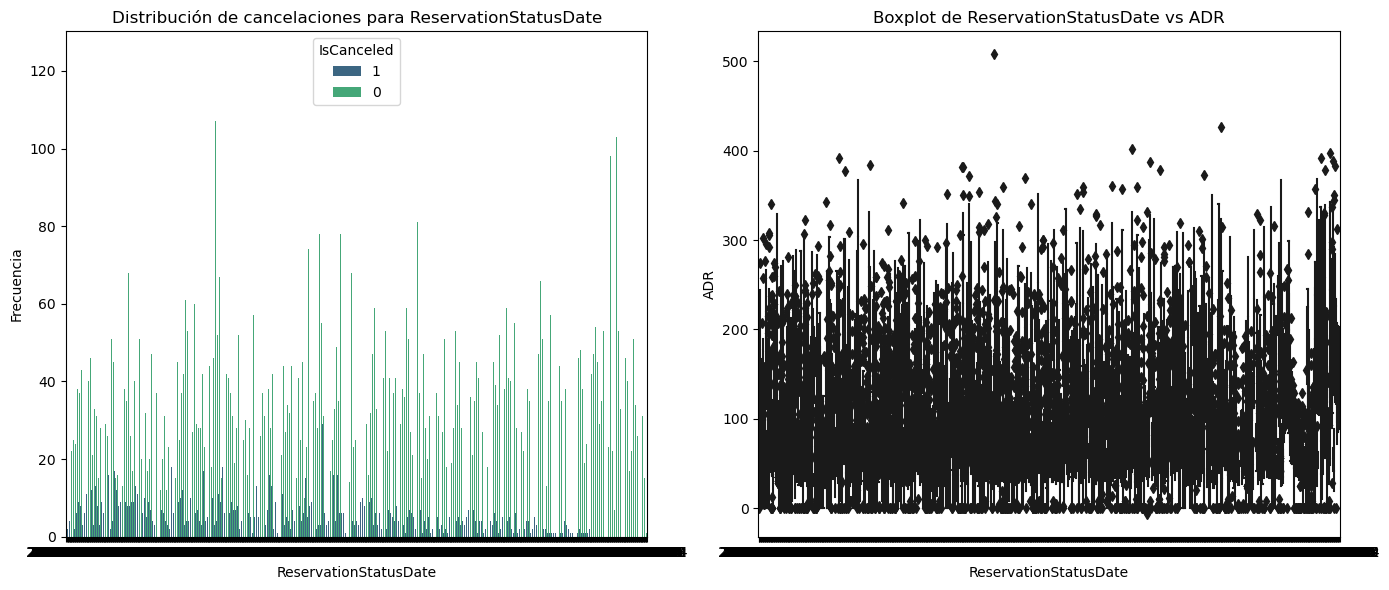

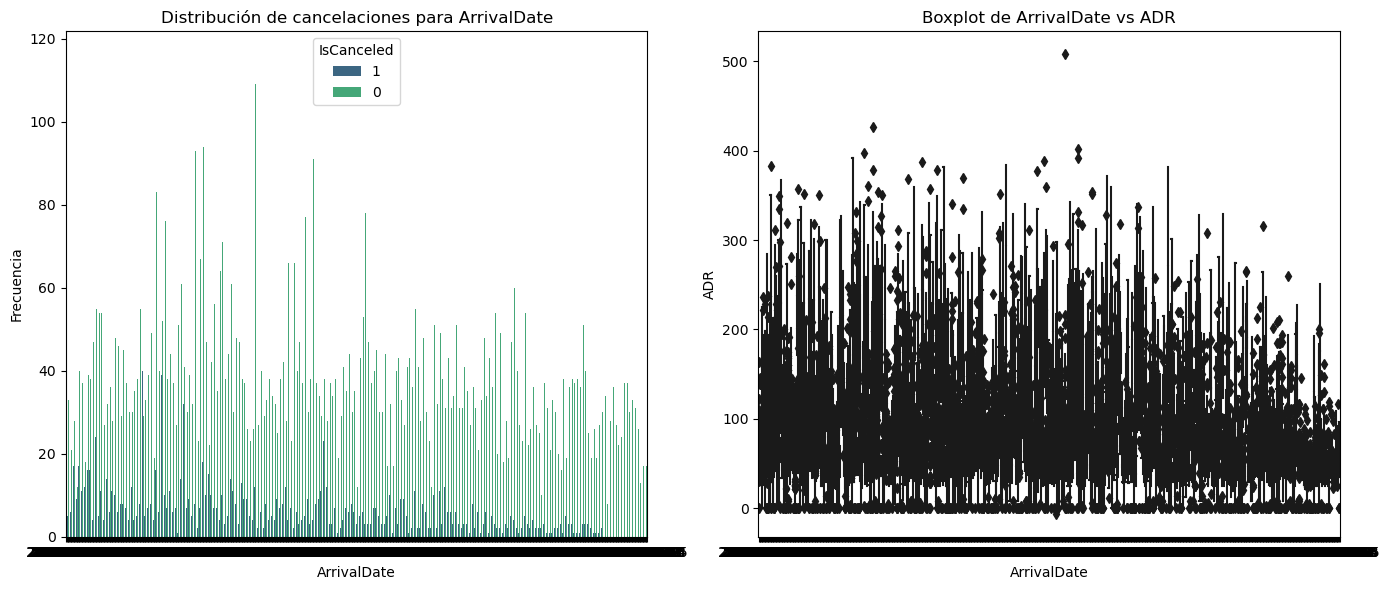

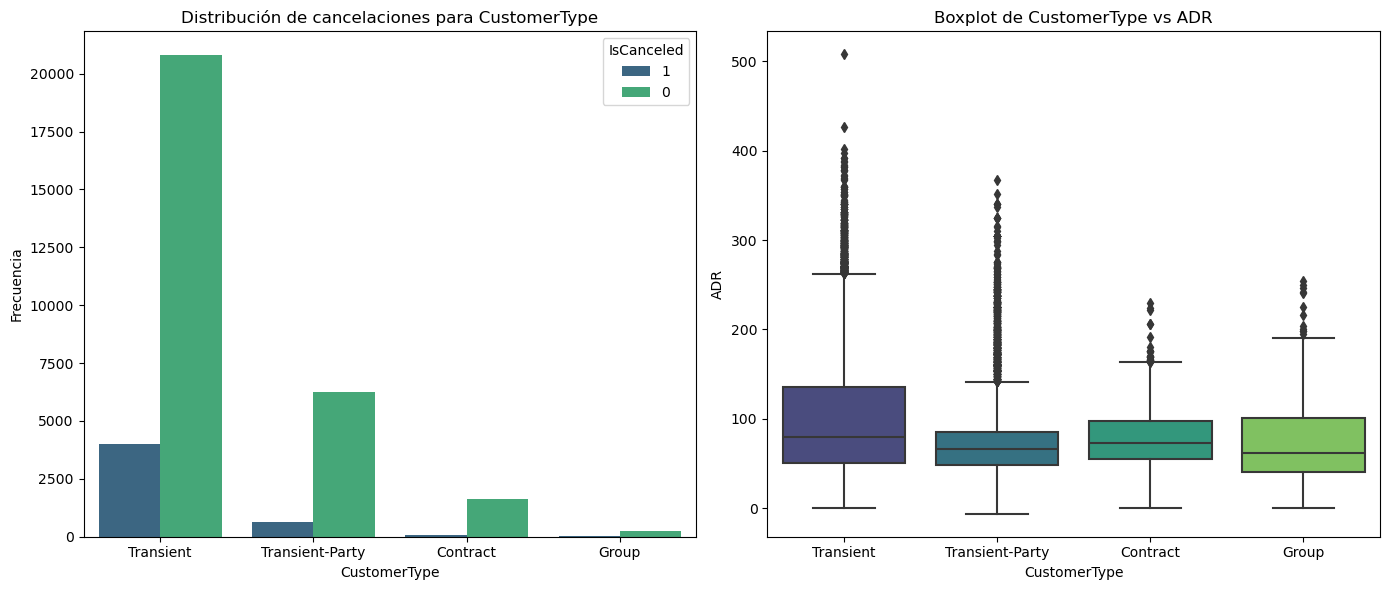

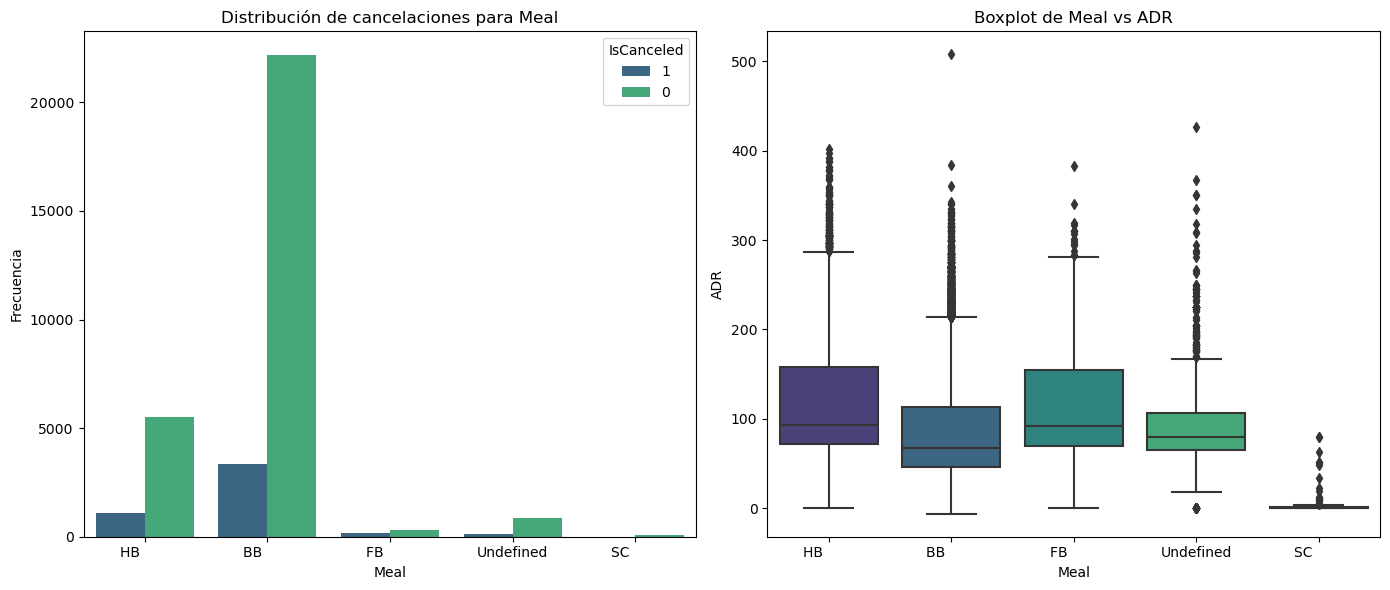

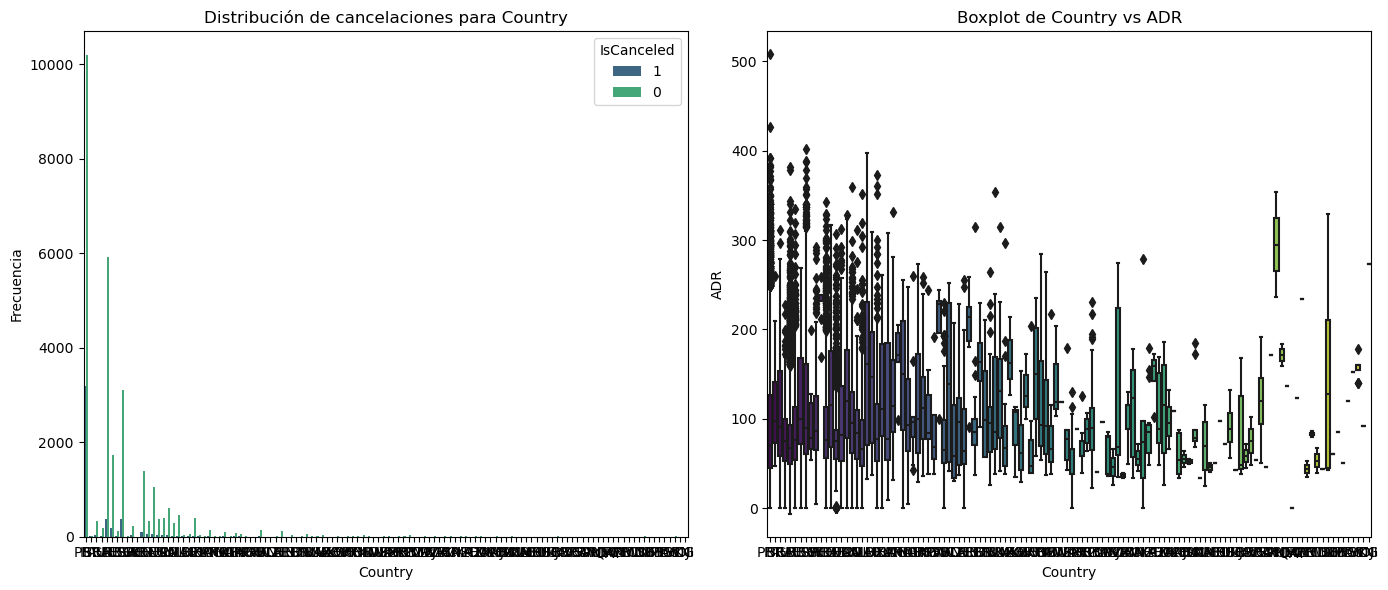

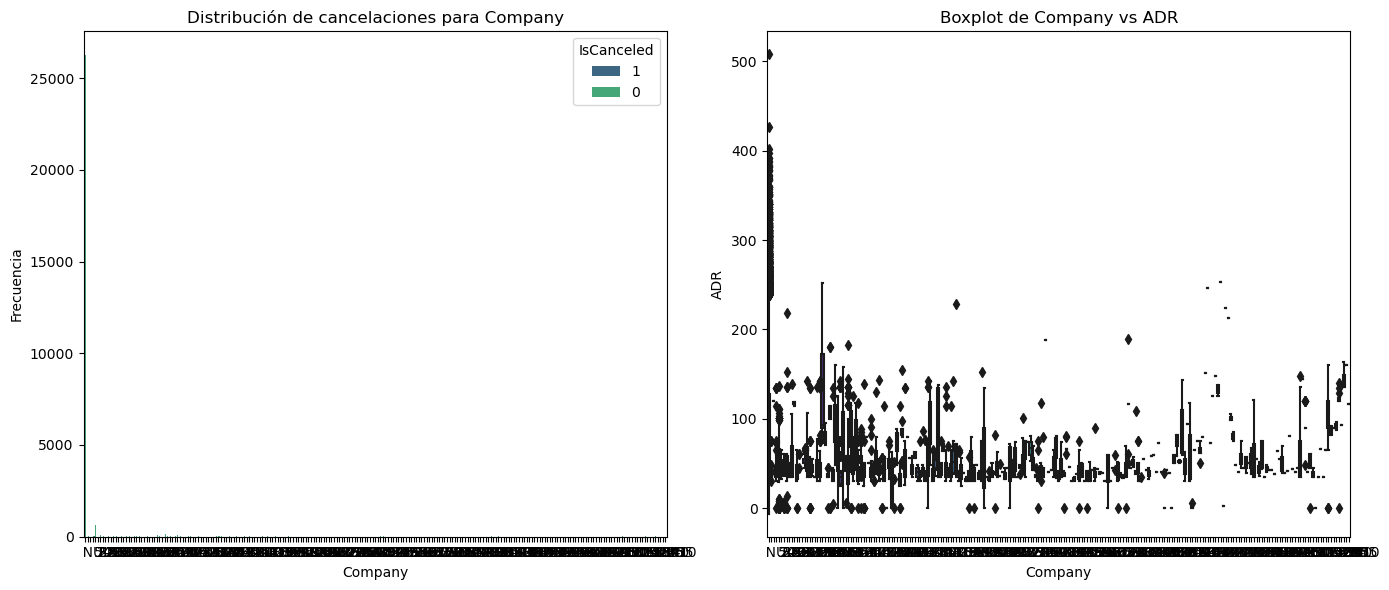

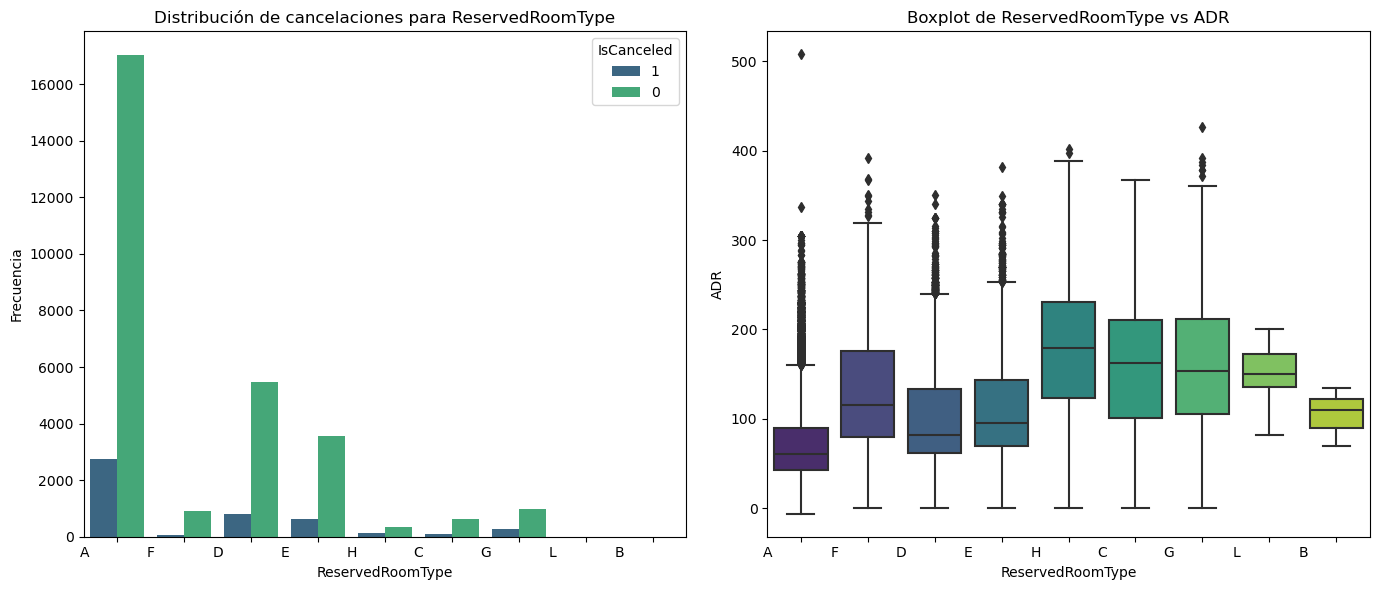

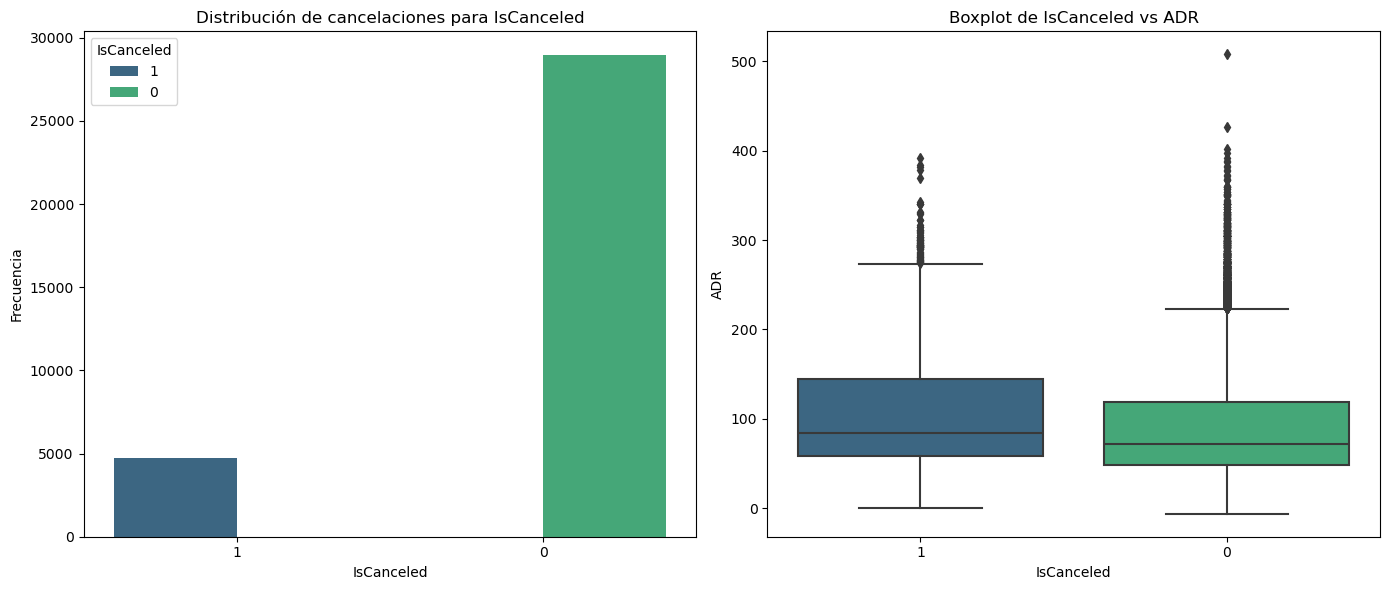

In [13]:
# Obtén las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Itera sobre las columnas categóricas y crea gráficos de barras apiladas y boxplots
for column in categorical_columns:
    plt.figure(figsize=(14, 6))
    
    # Crea un gráfico de barras apiladas
    plt.subplot(1, 2, 1)
    sns.countplot(x=column, hue='IsCanceled', data=df, palette='viridis')
    plt.title(f'Distribución de cancelaciones para {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    
    # Crea un boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=column, y='ADR', data=df, palette='viridis')
    plt.title(f'Boxplot de {column} vs ADR')
    plt.xlabel(column)
    plt.ylabel('ADR')

    plt.tight_layout()
    plt.show()

In [14]:
# Contar el número de valores únicos en la columna 'Country'
num_unique_countries = df['Country'].nunique()
print(f'Número de valores únicos en la columna "Country": {num_unique_countries}')

# Contar el número de valores únicos en la columna 'Company'
num_unique_companies = df['Company'].nunique()
print(f'Número de valores únicos en la columna "Company": {num_unique_companies}')

Número de valores únicos en la columna "Country": 118
Número de valores únicos en la columna "Company": 227


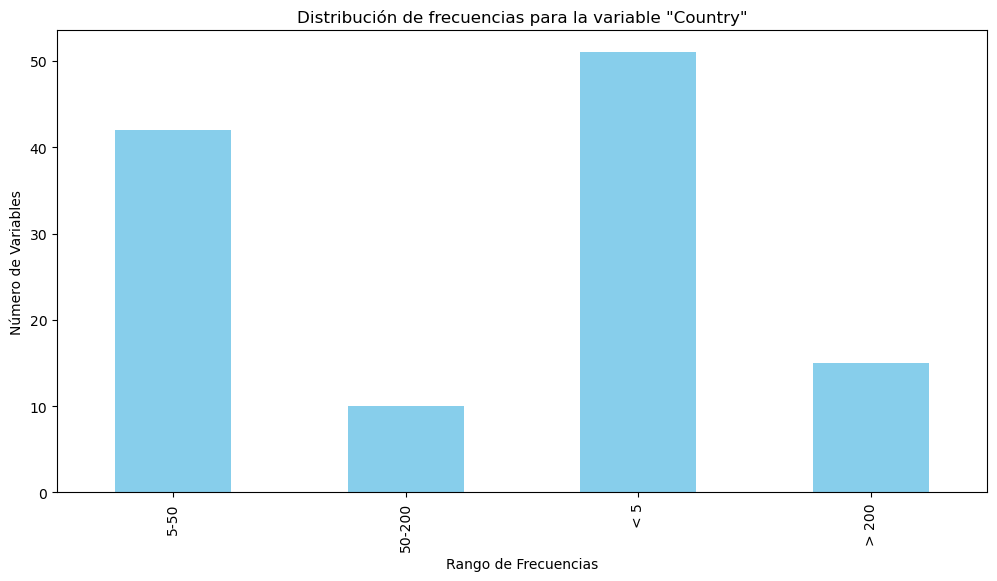

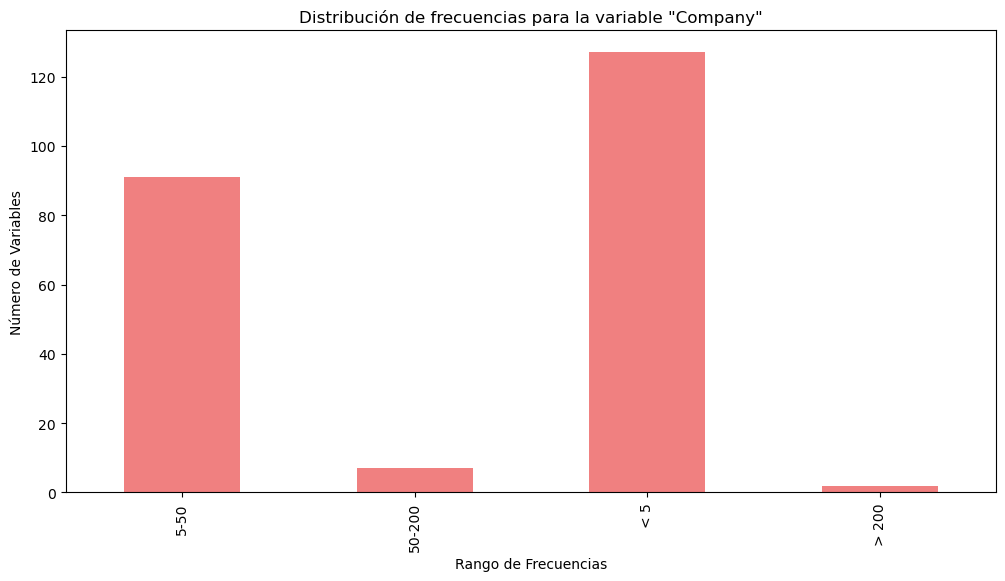

In [15]:
# Definir una función para clasificar las frecuencias en rangos
def categorize_frequency(frequency):
    if frequency < 5:
        return '< 5'
    elif 5 <= frequency <= 50:
        return '5-50'
    elif 50 < frequency <= 200:
        return '50-200'
    else:
        return '> 200'

# Calcular las frecuencias para 'Country'
country_frequencies = df['Country'].value_counts()

# Aplicar la función de clasificación
country_frequencies_categories = country_frequencies.apply(categorize_frequency)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
country_frequencies_categories.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de frecuencias para la variable "Country"')
plt.xlabel('Rango de Frecuencias')
plt.ylabel('Número de Variables')
plt.show()

# Calcular las frecuencias para 'Company'
company_frequencies = df['Company'].value_counts()

# Aplicar la función de clasificación
company_frequencies_categories = company_frequencies.apply(categorize_frequency)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
company_frequencies_categories.value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Distribución de frecuencias para la variable "Company"')
plt.xlabel('Rango de Frecuencias')
plt.ylabel('Número de Variables')
plt.show()

Correlación con 'IsCanceled':
LeadTime                0.184247
StaysInWeekendNights    0.063952
StaysInWeekNights       0.065218
Adults                  0.082504
Children                0.068612
ADR                     0.086152
IsRepeatedGuest        -0.072381
dtype: float64


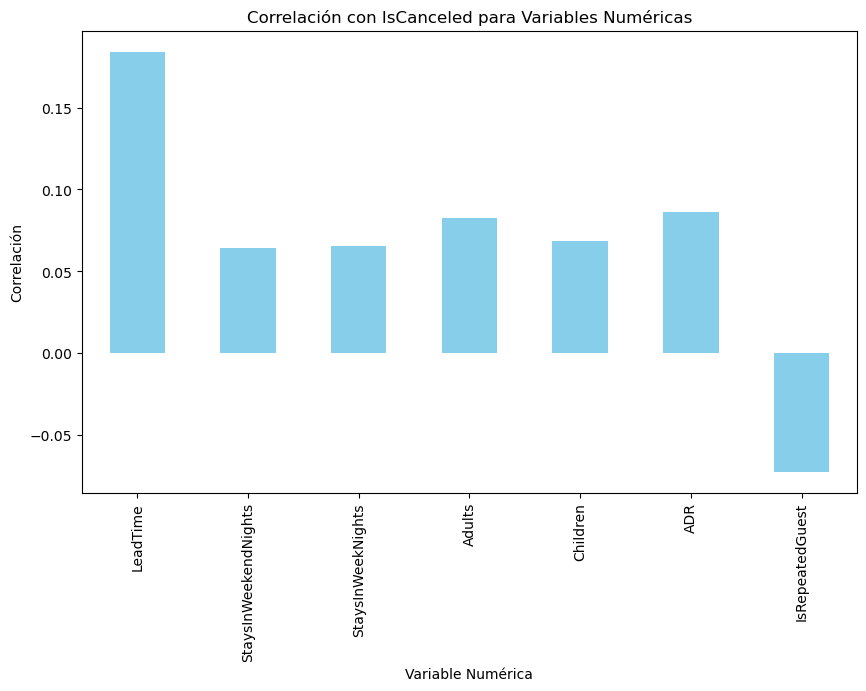

In [16]:
# Filtrar las variables numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación entre 'IsCanceled' y las variables numéricas
correlation_with_is_canceled = df_numeric.corrwith(df['IsCanceled'])

# Imprimir la correlación
print("Correlación con 'IsCanceled':")
print(correlation_with_is_canceled)

# Crear un gráfico de barras para la correlación con 'IsCanceled'
plt.figure(figsize=(10, 6))
correlation_with_is_canceled.plot(kind='bar', color='skyblue')
plt.title('Correlación con IsCanceled para Variables Numéricas')
plt.xlabel('Variable Numérica')
plt.ylabel('Correlación')
plt.show()

In [17]:
df['IsCanceled'] = df['IsCanceled'].astype(int)

### De todas las variables del marco de datos, creo que las variables más importantes son las relacionadas con el tiempo (ReservationStatusDate, ArrivalDate y LeadTime), así como ARD.

# Preparacion de los datos

### Primero, cambio las variables de fechas a numéricas y las divido en mes, día y año para que puedan ser utilizadas en el modelo.

In [18]:
df['ReservationStatusDate'] = pd.to_datetime(df['ReservationStatusDate'])
df['ReservationStatusDateYear'] = df['ReservationStatusDate'].dt.year
df['ReservationStatusDateMonth'] = df['ReservationStatusDate'].dt.month
df['ReservationStatusDateDay'] = df['ReservationStatusDate'].dt.day

In [19]:
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'])
df['ArrivalDateYear'] = df['ArrivalDate'].dt.year
df['ArrivalDateMonth'] = df['ArrivalDate'].dt.month
df['ArrivalDateDay'] = df['ArrivalDate'].dt.day

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33688 entries, 0 to 33687
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ReservationStatusDate       33688 non-null  datetime64[ns]
 1   ArrivalDate                 33688 non-null  datetime64[ns]
 2   LeadTime                    33688 non-null  int64         
 3   StaysInWeekendNights        33688 non-null  int64         
 4   StaysInWeekNights           33688 non-null  int64         
 5   Adults                      33688 non-null  int64         
 6   Children                    33688 non-null  int64         
 7   CustomerType                33688 non-null  object        
 8   ADR                         33688 non-null  float64       
 9   Meal                        33688 non-null  object        
 10  Country                     33256 non-null  object        
 11  Company                     33688 non-null  object    

### Ahora, utilizaría un OneHotEncoder en las variables categóricas para poder utilizarlas en el modelo. Sin embargo, noté que 'Country' y 'Company', como se muestra en el estudio anterior, tienen muy pocas categorías que se repiten de forma continua en el dataframe. Por lo tanto, he decidido eliminarlas, ya que creo que no aportarán información útil. Además, 'Meal' y 'ReservedRoomType' son variables que están muy relacionadas con el precio, así que decidí quedarme solo con ARD

In [21]:
df.head()
df = df.drop('ReservationStatusDate',axis=1)
df = df.drop('ArrivalDate',axis=1)
df = df.drop('Meal',axis=1)
df = df.drop('Country',axis=1)
df = df.drop('Company',axis=1)
df = df.drop('ReservedRoomType',axis=1)



### Tengo creada una función para realizar el OneHotEncoder de las variables. En este caso, solo lo aplicaré a una

In [22]:
CustomerType=df[["CustomerType"]]

In [23]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder(sparse=False)
def OneHot(df,columna,name):
    cat_encoder.fit_transform(columna)
    cat_content_1hot=cat_encoder.fit_transform(columna)
    df.reset_index(drop=False, inplace=True)
    df=df.join(pd.DataFrame(cat_content_1hot, columns=[cat for cat in cat_encoder.categories_[0]]))
    df = df.drop(name,axis=1)
    df = df.drop(df.iloc[:,[0,]], axis = 1)
    df.info()
    return df

In [24]:

df = OneHot(df,CustomerType,'CustomerType')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33688 entries, 0 to 33687
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LeadTime                    33688 non-null  int64  
 1   StaysInWeekendNights        33688 non-null  int64  
 2   StaysInWeekNights           33688 non-null  int64  
 3   Adults                      33688 non-null  int64  
 4   Children                    33688 non-null  int64  
 5   ADR                         33688 non-null  float64
 6   IsRepeatedGuest             33688 non-null  int64  
 7   IsCanceled                  33688 non-null  int32  
 8   ReservationStatusDateYear   33688 non-null  int32  
 9   ReservationStatusDateMonth  33688 non-null  int32  
 10  ReservationStatusDateDay    33688 non-null  int32  
 11  ArrivalDateYear             33688 non-null  int32  
 12  ArrivalDateMonth            33688 non-null  int32  
 13  ArrivalDateDay              336

c:\Users\jlmal\anaconda3\envs\ML\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\jlmal\anaconda3\envs\ML\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33688 entries, 0 to 33687
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LeadTime                    33688 non-null  int64  
 1   StaysInWeekendNights        33688 non-null  int64  
 2   StaysInWeekNights           33688 non-null  int64  
 3   Adults                      33688 non-null  int64  
 4   Children                    33688 non-null  int64  
 5   ADR                         33688 non-null  float64
 6   IsRepeatedGuest             33688 non-null  int64  
 7   IsCanceled                  33688 non-null  int32  
 8   ReservationStatusDateYear   33688 non-null  int32  
 9   ReservationStatusDateMonth  33688 non-null  int32  
 10  ReservationStatusDateDay    33688 non-null  int32  
 11  ArrivalDateYear             33688 non-null  int32  
 12  ArrivalDateMonth            33688 non-null  int32  
 13  ArrivalDateDay              336

# Creacion y entrernamiento de Modelos

In [26]:
from sklearn.model_selection import train_test_split
# separamoos el data set entre el target y el resto de datos
X =  df.drop("IsCanceled", axis=1)
y = df["IsCanceled"].copy()

# Utiliza train_test_split para dividir los set de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### El tipo de variable es una variable binaria; por lo tanto, tendríamos que utilizar un clasificador binario. Dentro de estos, el que utilizaré es XGBoost, que en mi experiencia es el que mejores resultados me ha dado, aunque podríamos también utilizar otros como KNN, Random Forest, etc

In [27]:
# Crear una instancia de XGBClassifier
xgb = XGBClassifier(learning_rate=0.1, max_depth=9, n_estimators=100, subsample=0.9, random_state=42)

# Entrenar el modelo de Random Forest utilizando los datos de entrenamiento
xgb.fit(X_train, y_train)

# Calcular el error de clasificación en el conjunto de entrenamiento
err_train = np.mean(y_train != xgb.predict(X_train))

# Imprimir el error de clasificación en el conjunto de entrenamiento
print('Training sample error: ', err_train)


Training sample error:  0.003116883116883117


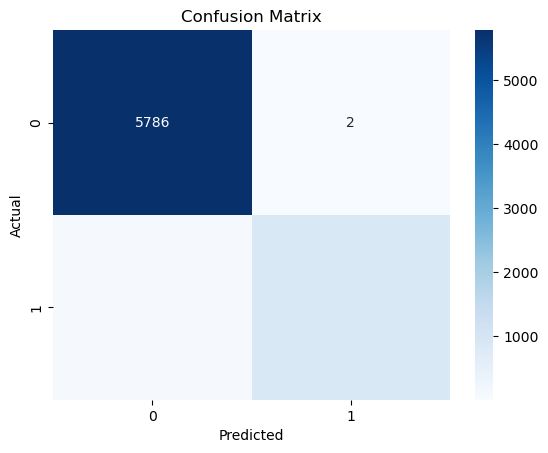

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5788
           1       1.00      0.93      0.96       950

    accuracy                           0.99      6738
   macro avg       0.99      0.96      0.98      6738
weighted avg       0.99      0.99      0.99      6738



In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Se obtienen las predicciones del modelo en el conjunto de prueba
y_pred = xgb.predict(X_test)

# Se crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Se genera el plot de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Se muestra el plot
plt.show()

# Se genera el informe de clasificación
classification_rep = classification_report(y_test, y_pred)

# Se imprime el informe de clasificación
print("Classification Report:\n", classification_rep)

### Los resultados de este modelo son bastante buenos, teniendo una precisión y sensibilidad superiores al 95%. Con este modelo, el cliente puede predecir fácilmente el número de reservas que habrá, y en caso de tener que redirigir personas a otros hoteles, el número de estas sería muy bajo debido al margen de error que tiene el modelo